In [60]:
import pandas as pd 
import numpy as np 
#read files
df1=pd.read_csv('movies_metadata.csv')
ratings=pd.read_csv('ratings.csv')

/Users/lianzeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
#Movie Data Preprocessing
data=pd.DataFrame(df1[['id','original_language','original_title','overview','popularity']])
data=data.dropna(axis=0,how='any')  
data=data[data['original_language'].isin(['en'])] # Only remain the movies which their overviews are in English

In [62]:
data.head() #The movie dataset after preprocessing

,id,original_language,original_title,overview,popularity
0,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469
1,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155
2,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129
3,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949
4,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752


In [63]:
#Prepocessing user data
#Calculate the count of votes and the total score of ratings each movie received

ratings1 = ratings.groupby(by=['movieId'])['rating'].sum()
ratings1=ratings1.to_frame()

one=pd.DataFrame(1 for i in range(len(ratings)))
ratings2=ratings.join(one)
ratings2=pd.DataFrame(ratings2)
ratings2= ratings2.rename(columns={0:'count'})

count = ratings2.groupby(by=['movieId'])['count'].sum()
data['id'] = data['id'].apply(int)
data['popularity'] = data['popularity'].apply(float)

final=pd.merge(data, ratings1, right_index=True, left_on='id')
final=pd.merge(final, count, right_index=True, left_on='id')

#Calculate the average score of ratings.
final['average_count']=final['rating']/final['count']

In [64]:
#C is the mean vote across the whole report
C= final['average_count'].mean()
C

3.1354517301766602

In [65]:
#m is the minimum votes required to be listed in the chart;
m= final['count'].quantile(0.9)
m

3457.800000000001

In [66]:
# filter out the movies that qualify for the chart
q_movies = final.copy().loc[final['count'] >= m]
q_movies.shape

(539, 8)

In [67]:

def weighted_rating(x, m=m, C=C):
    v = x['count']
    R = x['average_count']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)
# Define a new feature 'score' and calculate its value with `weighted_rating()`
final['score'] = final.apply(weighted_rating, axis=1)

In [68]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
q_movies['score']=q_movies['score']+q_movies['popularity']
q_movies

,id,original_language,original_title,overview,popularity,rating,count,average_count,score
14,1408,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",7.284477,51527.0,13888,3.710181,10.880089
15,524,en,Casino,The life of the gambling paradise – Las Vegas ...,10.137389,32209.5,9163,3.515170,13.548525
17,5,en,Four Rooms,It's Ted the Bellhop's first night on the job....,9.026586,46988.0,15258,3.079565,12.116476
61,2054,en,Mr. Holland's Opus,"In 1965, passionate musician Glenn Holland tak...",7.137117,50839.5,18807,2.703222,9.907466
195,281,en,Strange Days,Set in the year 1999 during the last days of t...,11.223055,14956.0,4088,3.658513,14.641879
...,...,...,...,...,...,...,...,...,...
44144,68954,en,Longitude,Parallel stories: 18th century Harrison builds...,6.051227,89360.0,22460,3.978629,9.917364
44256,3210,en,The Projected Man,Matter-transmitter sabotage leaves a British s...,0.720828,34661.5,9516,3.642444,4.228148
44480,2791,en,The Chronicles of Riddick: Dark Fury,"After their narrow escape at the end of ""Pitch...",1.628881,82977.0,21907,3.787693,5.327659
44984,3178,en,Beat,The story of writer William Seward Burroughs a...,0.758451,19835.0,5316,3.731189,4.254857


In [69]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['original_title', 'count', 'average_count', 'score','overview']].head(10)
q_movies=q_movies.reset_index()

Text(0.5, 1.0, 'Popular Movies')

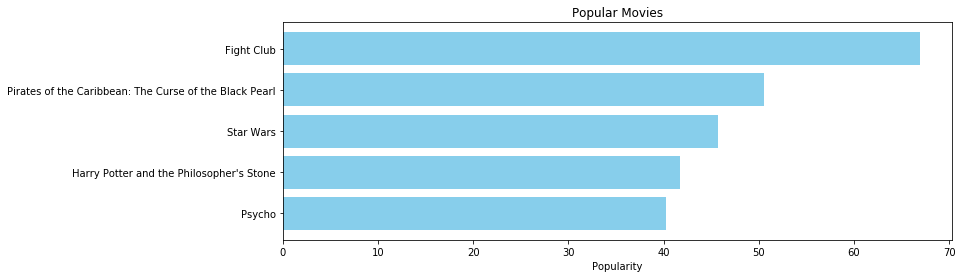

In [70]:
#plot the top five movies
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(q_movies['original_title'].head(5),q_movies['score'].head(5), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [59]:
#Popularity Based demo
print('\033[1m' + "Popularity Based Results")
print('\033[0m')
for i in range(len(q_movies[0:5])):
    print('Title: ',q_movies['original_title'][i])
    print('Score: ',q_movies['score'][i])
    print('Overview: ',q_movies['overview'][i])
    print('\n')
        

Popularity Based Results

Title:  Fight Club
Score:  66.9788833330168
Overview:  A ticking-time-bomb insomniac and a slippery soap salesman channel primal male aggression into a shocking new form of therapy. Their concept catches on, with underground "fight clubs" forming in every town, until an eccentric gets in the way and ignites an out-of-control spiral toward oblivion.


Title:  Pirates of the Caribbean: The Curse of the Black Pearl
Score:  50.58784404090121
Overview:  Jack Sparrow, a freewheeling 17th-century pirate who roams the Caribbean Sea, butts heads with a rival pirate bent on pillaging the village of Port Royal. When the governor's daughter is kidnapped, Sparrow decides to help the girl's love save her. But their seafaring mission is hardly simple.


Title:  Star Wars
Score:  45.73110725049731
Overview:  Princess Leia is captured and held hostage by the evil Imperial forces in their effort to take over the galactic Empire. Venturesome Luke Skywalker and dashing captain Ha